In [199]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.utils import shuffle

In [144]:
# Load the datasets
awards_players_df = pd.read_csv('../../dataset/awards_players.csv')
coaches_df = pd.read_csv('../../dataset/coaches.csv')
players_df = pd.read_csv('../../dataset/players.csv')
players_teams_df = pd.read_csv('../../dataset/players_teams.csv')
series_post_df = pd.read_csv('../../dataset/series_post.csv')
teams_df = pd.read_csv('../../dataset/teams.csv')
teams_post_df = pd.read_csv('../../dataset/teams_post.csv')

In [145]:
# Remove useless columns from the datasets
awards_players_df = awards_players_df.drop(columns=['lgID'])
players_df = players_df.drop(columns=['firstseason', 'lastseason', 'deathDate'])
coaches_df = coaches_df.drop(columns=['lgID'])
series_post_df = series_post_df.drop(columns=['lgIDLoser', 'lgIDWinner'])
teams_post_df = teams_post_df.drop(columns=['lgID'])
teams_df = teams_df.drop(columns=['lgID', 'divID', 'seeded', 'tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB'])
players_teams_df = players_teams_df.drop(columns=['lgID'])

In [146]:
# Display the first few rows of each cleaned DataFrame (optional)
awards_players_df.head()

,playerID,award,year
0,thompti01w,All-Star Game Most Valuable Player,1
1,leslili01w,All-Star Game Most Valuable Player,2
2,leslili01w,All-Star Game Most Valuable Player,3
3,teaslni01w,All-Star Game Most Valuable Player,4
4,swoopsh01w,All-Star Game Most Valuable Player,6


In [147]:
players_df.head()

,bioID,pos,height,weight,college,collegeOther,birthDate
0,abrahta01w,C,74.0,190,George Washington,NaN,1975-09-27
1,abrossv01w,F,74.0,169,Connecticut,NaN,1980-07-09
2,adairje01w,C,76.0,197,George Washington,NaN,1986-12-19
3,adamsda01w,F-C,73.0,239,Texas A&M,Jefferson College (JC),1989-02-19
4,adamsjo01w,C,75.0,180,New Mexico,NaN,1981-05-24


In [148]:
coaches_df.head()

,coachID,year,tmID,stint,won,lost,post_wins,post_losses
0,adamsmi01w,5,WAS,0,17,17,1,2
1,adubari99w,1,NYL,0,20,12,4,3
2,adubari99w,2,NYL,0,21,11,3,3
3,adubari99w,3,NYL,0,18,14,4,4
4,adubari99w,4,NYL,0,16,18,0,0


In [149]:
series_post_df.head()

,year,round,series,tmIDWinner,tmIDLoser,W,L
0,1,FR,A,CLE,ORL,2,1
1,1,FR,B,NYL,WAS,2,0
2,1,FR,C,LAS,PHO,2,0
3,1,FR,D,HOU,SAC,2,0
4,1,CF,E,HOU,LAS,2,0


In [150]:
teams_post_df.head()

,year,tmID,W,L
0,1,HOU,6,0
1,1,ORL,1,2
2,1,CLE,3,3
3,1,WAS,0,2
4,1,NYL,4,3


In [151]:
teams_df.head()

,year,tmID,franchID,confID,rank,playoff,firstRound,semis,finals,name,...,GP,homeW,homeL,awayW,awayL,confW,confL,min,attend,arena
0,9,ATL,ATL,EA,7,N,NaN,NaN,NaN,Atlanta Dream,...,34,1,16,3,14,2,18,6825,141379,Philips Arena
1,10,ATL,ATL,EA,2,Y,L,NaN,NaN,Atlanta Dream,...,34,12,5,6,11,10,12,6950,120737,Philips Arena
2,1,CHA,CHA,EA,8,N,NaN,NaN,NaN,Charlotte Sting,...,32,5,11,3,13,5,16,6475,90963,Charlotte Coliseum
3,2,CHA,CHA,EA,4,Y,W,W,L,Charlotte Sting,...,32,11,5,7,9,15,6,6500,105525,Charlotte Coliseum
4,3,CHA,CHA,EA,2,Y,L,NaN,NaN,Charlotte Sting,...,32,11,5,7,9,12,9,6450,106670,Charlotte Coliseum


In [152]:
players_teams_df.head()

,playerID,year,stint,tmID,GP,GS,minutes,points,oRebounds,dRebounds,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ
0,abrossv01w,2,0,MIN,26,23,846,343,43,131,...,0,0,0,0,0,0,0,0,0,0
1,abrossv01w,3,0,MIN,27,27,805,314,45,101,...,0,0,0,0,0,0,0,0,0,0
2,abrossv01w,4,0,MIN,30,25,792,318,44,97,...,1,8,8,22,6,8,8,7,3,0
3,abrossv01w,5,0,MIN,22,11,462,146,17,57,...,2,3,7,23,8,4,2,8,2,0
4,abrossv01w,6,0,MIN,31,31,777,304,29,78,...,0,0,0,0,0,0,0,0,0,0


In [163]:
# Merge datasets
players_teams_merged = pd.merge(players_df, players_teams_df, left_on='bioID', right_on='playerID')

team_player_stats = players_teams_merged.groupby('tmID').agg({
    'points': 'mean',
    'assists': 'mean',
    'rebounds': 'mean'
}).reset_index()


teams_df = teams_df.sort_values(['tmID', 'year'])
teams_df['playoffNextYear'] = teams_df['playoff'].shift(-1)
teams_df.loc[teams_df['franchID'] != teams_df['franchID'].shift(-1), 'playoffNextYear'] = None
teams_df['playoffNextYear'] = teams_df['playoffNextYear'].map({'Y': 1, 'N': 0})
teams_df['playoffNextYear'] = teams_df['playoffNextYear'].fillna(0)

teams_full = pd.merge(teams_df, team_player_stats, on='tmID')

In [164]:
# Select only numeric columns
numeric_teams_full = teams_full.select_dtypes(include=['number'])

# Calculate the correlation matrix for all numeric variables
correlation_matrix = numeric_teams_full.corr()

# Filter the correlation matrix for correlations greater than 0.95
high_correlation = correlation_matrix[correlation_matrix.abs() > 0.95]

# Create a dictionary to store the new variable calculations
new_columns = {}
# Set to store columns to drop
columns_to_drop = set()

for column in high_correlation.columns:
    for index in range(len(high_correlation)):
        if abs(high_correlation[column][index]) > 0.95 and column != high_correlation.index[index]:
            feature_1 = high_correlation.index[index]
            feature_2 = column
            
            # Create a new column name for the quotient
            new_column_name = f"{feature_1}_div_{feature_2}"
            # Calculate the quotient and store it in teams_full
            teams_full[new_column_name] = teams_full[feature_1] / teams_full[feature_2]
            
            # Add the original columns to the drop set
            columns_to_drop.add(feature_1)
            columns_to_drop.add(feature_2)

# Drop the original columns with high correlation from teams_full
teams_full.drop(columns=columns_to_drop, inplace=True)

# Display the updated DataFrame
print(teams_full.head())


   year tmID franchID confID  rank playoff firstRound semis finals  \
0     9  ATL      ATL     EA     7       N        NaN   NaN    NaN   
1    10  ATL      ATL     EA     2       Y          L   NaN    NaN   
2     1  CHA      CHA     EA     8       N        NaN   NaN    NaN   
3     2  CHA      CHA     EA     4       Y          W     W      L   
4     3  CHA      CHA     EA     2       Y          L   NaN    NaN   

              name  ...  d_dreb_div_d_reb  d_fgm_div_d_pts  lost_div_won  \
0    Atlanta Dream  ...          0.683004         0.352206      7.500000   
1    Atlanta Dream  ...          0.699319         0.356096      0.888889   
2  Charlotte Sting  ...          0.670707         0.361877      3.000000   
3  Charlotte Sting  ...          0.622393         0.364360      0.777778   
4  Charlotte Sting  ...          0.677596         0.364744      0.777778   

   won_div_lost  min_div_GP  homeL_div_homeW  homeW_div_homeL  \
0      0.133333  200.735294        16.000000         0.06

In [165]:
numeric_teams_full = teams_full.select_dtypes(include=['number'])

# Calculate the correlation matrix for all numeric variables
correlation_matrix = numeric_teams_full.corr()

# Filter the correlation matrix for correlations greater than 0.95
high_correlation = correlation_matrix[correlation_matrix.abs() > 0.95]

# Create a dictionary to store the new variable calculations
new_columns = {}
# Set to store columns to drop
columns_to_drop = set()

for column in high_correlation.columns:
    for index in range(len(high_correlation)):
        if abs(high_correlation[column][index]) > 0.95 and column != high_correlation.index[index]:
            feature_1 = high_correlation.index[index]
            feature_2 = column
            
            # Create a new column name for the quotient
            new_column_name = f"{feature_1}_div_{feature_2}"
            # Calculate the quotient and store it
            new_columns[new_column_name] = numeric_teams_full[feature_1] / numeric_teams_full[feature_2]
            
            # Add the original columns to the drop set
            columns_to_drop.add(feature_1)
            columns_to_drop.add(feature_2)

# Add the new quotient columns to the DataFrame
for new_col_name, new_col_data in new_columns.items():
    numeric_teams_full[new_col_name] = new_col_data

# Drop the original columns with high correlation
numeric_teams_full.drop(columns=columns_to_drop, inplace=True)

# Display the updated DataFrame
print(numeric_teams_full.head())

   year  rank  o_fga  o_ftm  o_fta  o_oreb  o_dreb  o_reb  o_asts  o_pf  ...  \
0     9     7   2258    542    725     340     737   1077     492   796  ...   
1    10     2   2428    569    755     404     855   1259     547   741  ...   
2     1     8   1903    431    577     305     630    935     551   713  ...   
3     2     4   1780    410    528     309     639    948     467   605  ...   
4     3     2   1790    490    663     302     653    955     496   647  ...   

   o_3pa_div_o_3pm_div_o_3pm_div_o_3pa  o_pts_div_o_fgm_div_o_fgm_div_o_pts  \
0                             8.763945                             8.016174   
1                            10.763004                             6.902079   
2                             8.682245                             7.247501   
3                             7.825366                             7.588326   
4                             6.238157                             8.470368   

   d_fgm_div_d_pts_div_d_pts_div_d_fgm  d_ft

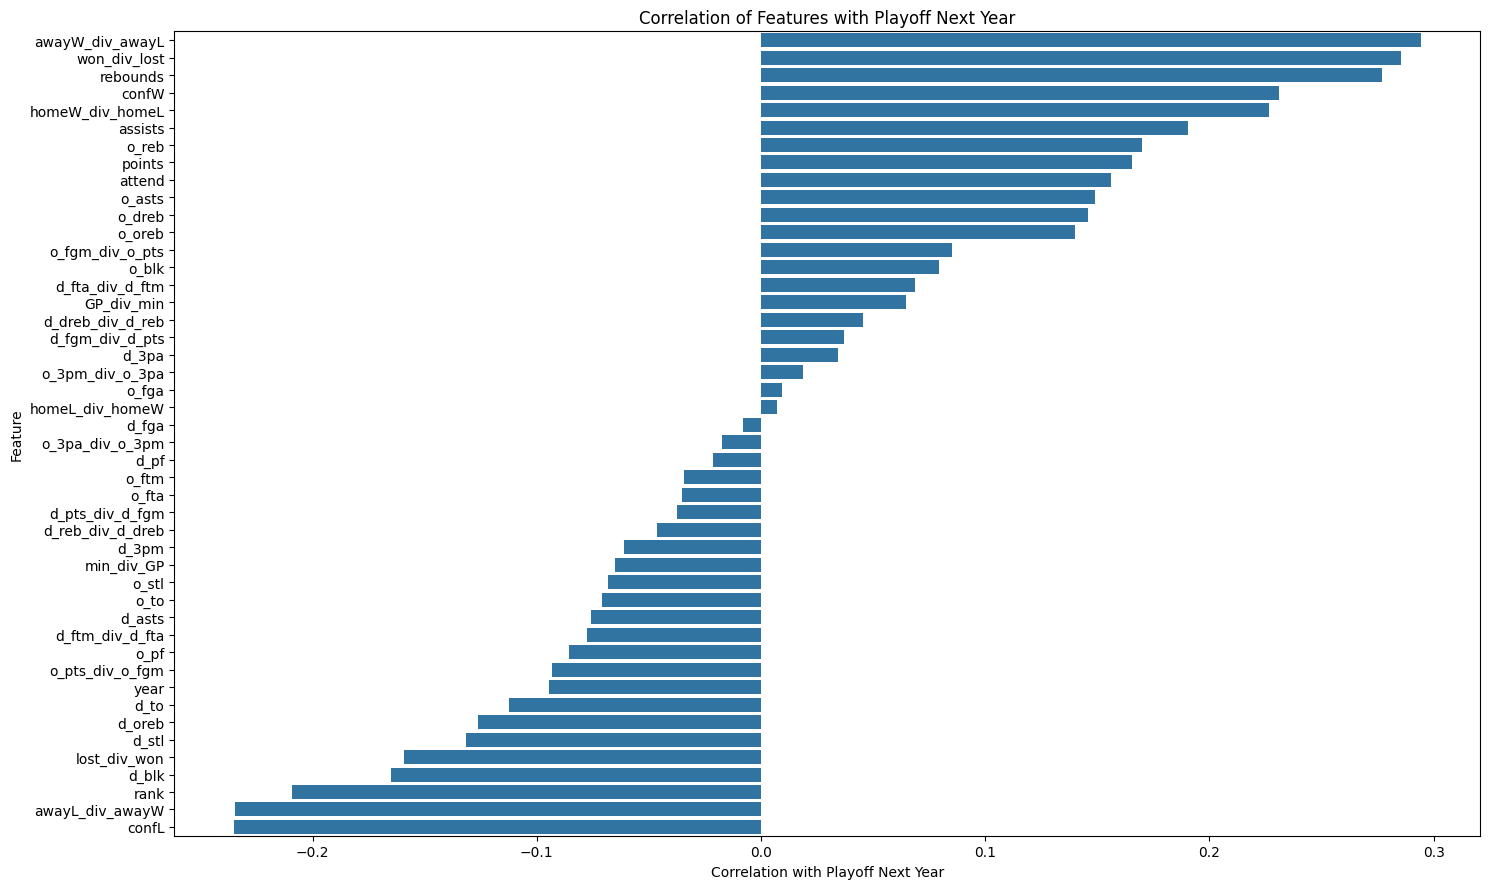

In [166]:
# Select only numeric columns
numeric_teams_full = teams_full.select_dtypes(include=['number'])

# Calculate correlation of all numeric variables with the target variable
correlations = numeric_teams_full.corr()['playoffNextYear']

# Drop the correlation of the target with itself
correlations = correlations.drop('playoffNextYear')

# Sort the correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)

# Display the sorted correlation values
correlation_df = sorted_correlations.reset_index()
correlation_df.columns = ['Feature', 'Correlation']

# Plot sorted correlations
plt.figure(figsize=(15, 9))
sns.barplot(x='Correlation', y='Feature', data=correlation_df)

# Add labels and title
plt.xlabel('Correlation with Playoff Next Year')
plt.ylabel('Feature')
plt.title('Correlation of Features with Playoff Next Year')
plt.tight_layout()

# Show the plot
plt.show()

In [197]:
teams_full.head()

,year,tmID,franchID,confID,rank,playoff,firstRound,semis,finals,name,...,d_dreb_div_d_reb,d_fgm_div_d_pts,lost_div_won,won_div_lost,min_div_GP,homeL_div_homeW,homeW_div_homeL,awayL_div_awayW,awayW_div_awayL,GP_div_min
0,9,ATL,ATL,EA,7,N,NaN,NaN,NaN,Atlanta Dream,...,0.683004,0.352206,7.500000,0.133333,200.735294,16.000000,0.062500,4.666667,0.214286,0.004982
1,10,ATL,ATL,EA,2,Y,L,NaN,NaN,Atlanta Dream,...,0.699319,0.356096,0.888889,1.125000,204.411765,0.416667,2.400000,1.833333,0.545455,0.004892
2,1,CHA,CHA,EA,8,N,NaN,NaN,NaN,Charlotte Sting,...,0.670707,0.361877,3.000000,0.333333,202.343750,2.200000,0.454545,4.333333,0.230769,0.004942
3,2,CHA,CHA,EA,4,Y,W,W,L,Charlotte Sting,...,0.622393,0.364360,0.777778,1.285714,203.125000,0.454545,2.200000,1.285714,0.777778,0.004923
4,3,CHA,CHA,EA,2,Y,L,NaN,NaN,Charlotte Sting,...,0.677596,0.364744,0.777778,1.285714,201.562500,0.454545,2.200000,1.285714,0.777778,0.004961


In [193]:
features = ['awayW_div_awayL', 'won_div_lost', 'rebounds', 'homeL_div_homeW', 'assists']
target = 'playoffNextYear'

In [200]:
train_data = teams_full[teams_full['year'] < 5]
train_data = shuffle(train_data)
test_data = teams_full[teams_full['year'].isin([6,7])]

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

In [201]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.48148148148148145
Classification Report:
               precision    recall  f1-score   support

         0.0       0.38      0.45      0.42        11
         1.0       0.57      0.50      0.53        16

    accuracy                           0.48        27
   macro avg       0.48      0.48      0.47        27
weighted avg       0.50      0.48      0.49        27



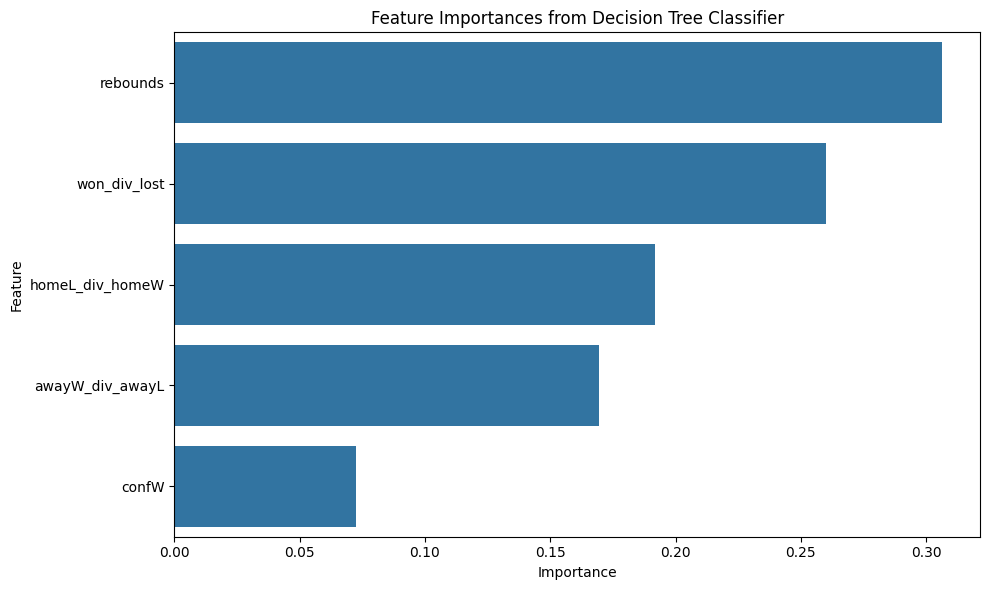

In [180]:
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names with their importance values
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)

# Add labels and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree Classifier')
plt.tight_layout()

# Show the plot
plt.show()